In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pymc as pm
from pymc.ode import DifferentialEquation

from itertools import product
import os.path as osp
from scipy.optimize import leastsq
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import math
import time
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
from IPython.display import display as print
from datetime import datetime
from scipy.integrate import odeint

# import sunode
import pickle

import core


In [2]:
db_csv_path = "dataset/data.csv"
idata_save_path = "odes-exp04-idata-4-number-1core-c0number-halfnormks-from-core.py-success.dt"

dataset_ori = core.MyDataset(db_csv_path)
df_ori = dataset_ori.get_df()
cct_names, rates_names, error_names = dataset_ori.get_var_col_names()
c0 = df_ori[cct_names].iloc[0].values


/Users/izhangxm/WorkStation/PycharmProjects/N15Tracing/core.py:314: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


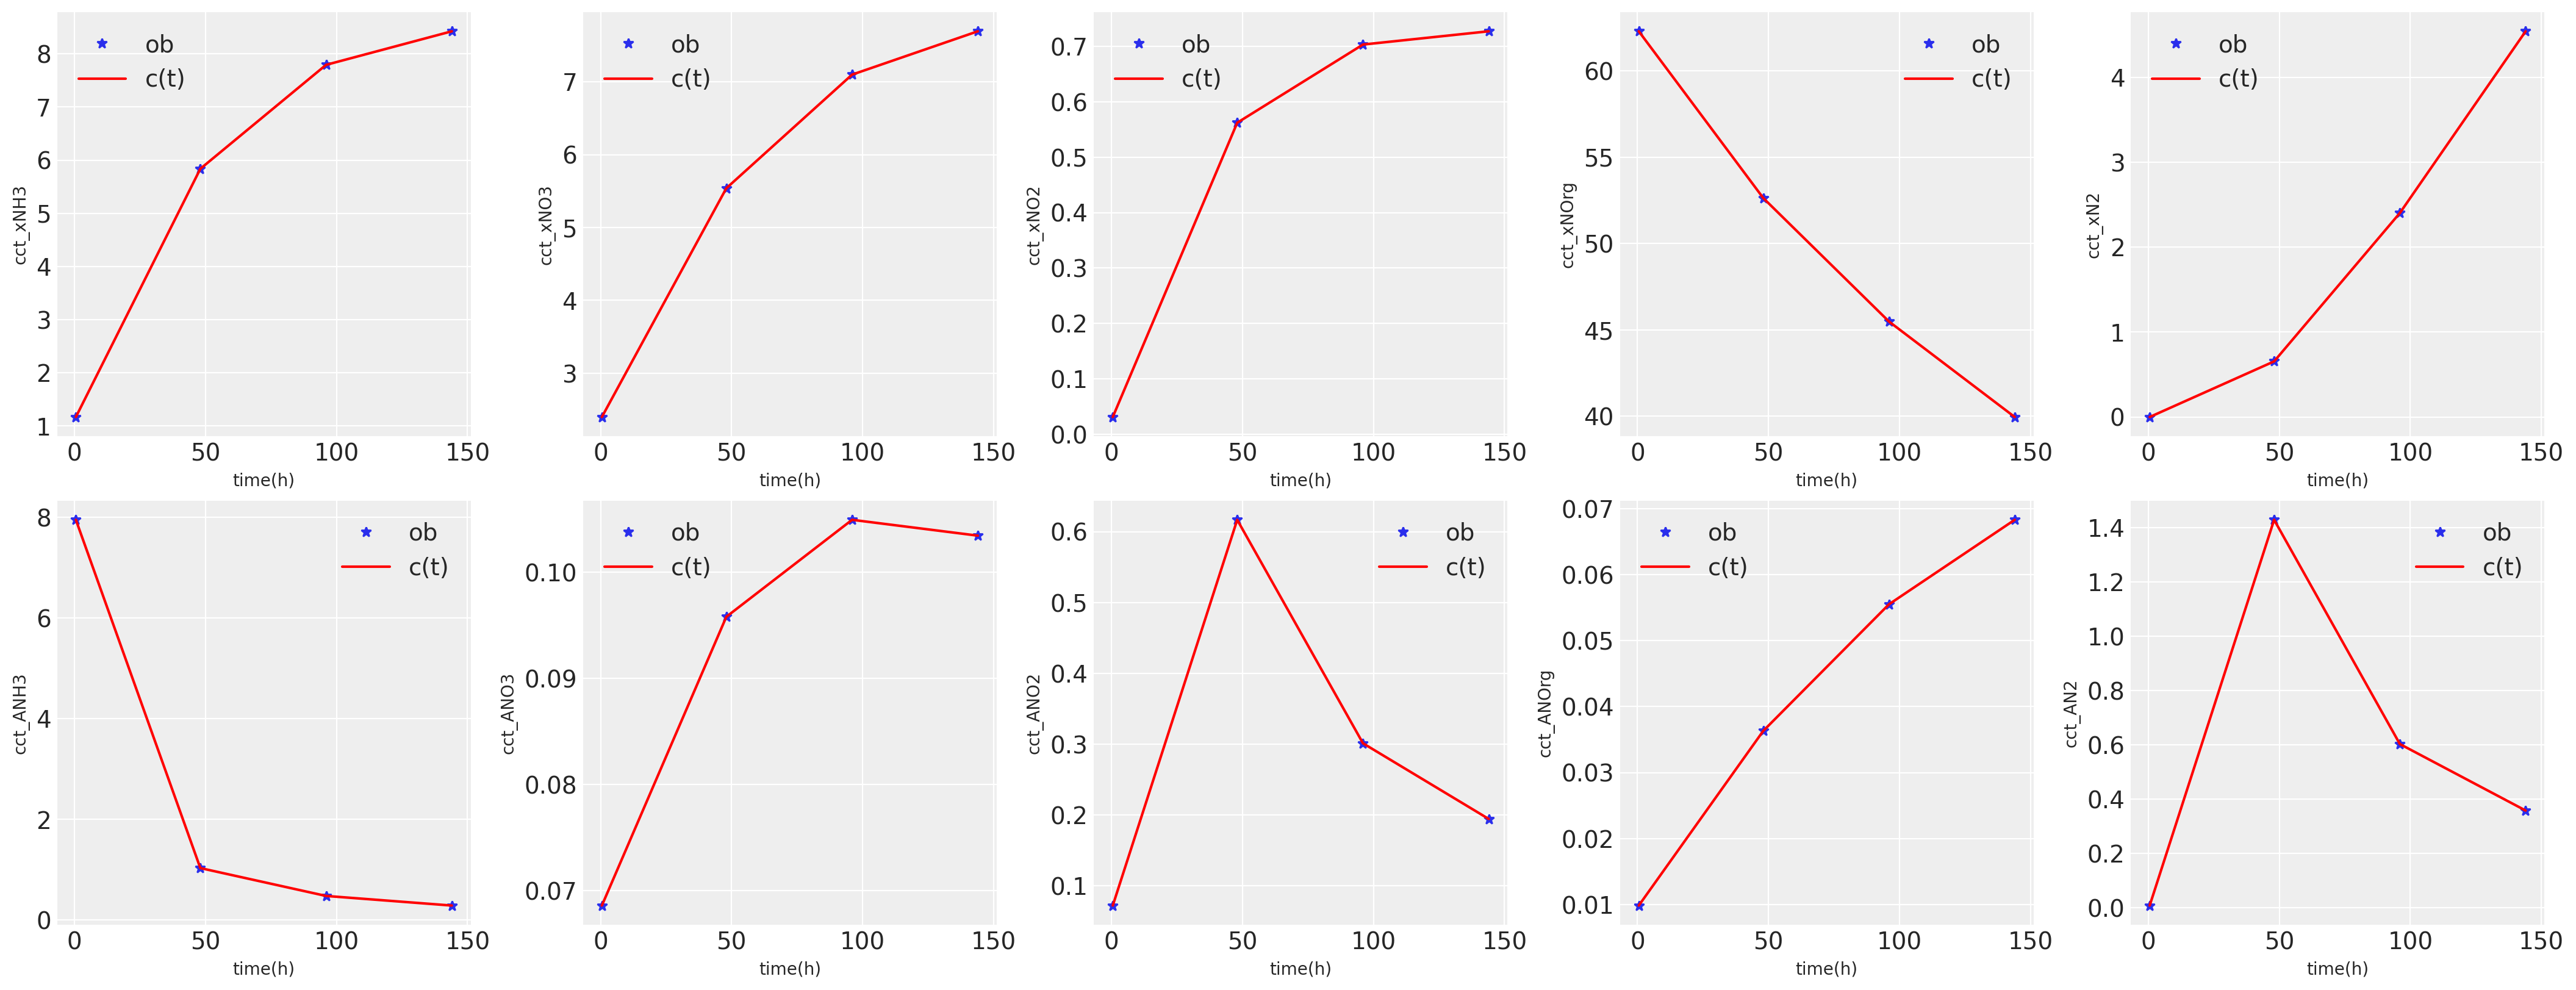

In [3]:
# 假设都是一级动力学
k_kinetics = np.repeat(1, 11).astype(np.uint8) 
# k_kinetics = np.array([0,0,0,0,1,1,0,0,1,1,0]).astype(np.uint8) 
ks = np.array([0.00071942, 0.00269696, 0.00498945, 0.00444931, 0.00571299, 0.00801272, 0.00131931, 0.00319959, 0.00415571, 0.00228432, 0.00177611])
#  =======================================================

# t_eval = np.linspace(0.5, 150, 8)
t_eval = np.array([0.5, 48, 96, 144])


dataset = core.MyDataset(db_csv_path)
df = dataset.get_df()
cct_names, rates_names, error_names = dataset.get_var_col_names()
c0 = df[cct_names].iloc[0].values
dataset.set_as_sim_dataset(core.dcdt_func_for_odeint, t_eval, c0, args=(ks, k_kinetics))
df = dataset.get_df()

core.plot_dataset(dataset, dataset)

In [4]:
mcmc_model = core.get_model(dataset, t_eval, k_kinetics, distance=core.distance_func, epsilon=core.epsilon, k_sigma_priors=0.01, kf_type=0, c0_type=0)

[1.16666667e+00 2.39880952e+00 3.11000000e-02 6.22850000e+01
 7.11000000e-05 7.94863498e+00 6.85792330e-02 7.23100000e-02
 9.85666700e-03 8.32000000e-03]


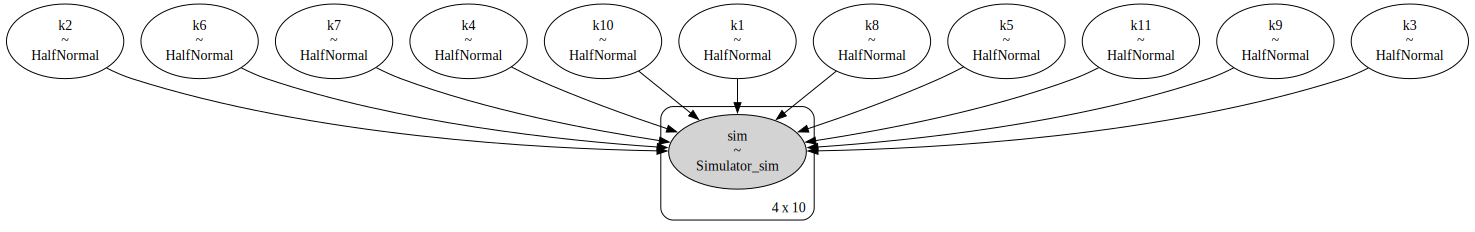

In [5]:
# print(get_format_time(),idata_save_path)
# print(ks, c0)
pm.model_to_graphviz(mcmc_model)

In [6]:
print(idata_save_path)
idata_lv = pickle.load(open(idata_save_path, 'rb'))

# idata_lv = pm.sample_smc(draws=2000, chains=1, model=mcmc_model, progressbar=False)
# pickle.dump(idata_lv,open(idata_save_path, 'wb'))

'odes-exp04-idata-4-number-1core-c0number-halfnormks-from-core.py-success.dt'

In [7]:
# az.plot_trace(idata_lv, kind="rank_vlines");
df[cct_names]

,xNH3,xNO3,xNO2,xNOrg,xN2,ANH3,ANO3,ANO2,ANOrg,AN2
0,1.166667,2.398810,0.031100,62.285000,0.000071,7.948635,0.068579,0.072310,0.009857,0.008320
1,5.837087,5.539301,0.562177,52.633247,0.654953,1.032210,0.095807,0.616771,0.036312,1.427762
2,7.792909,7.098859,0.703303,45.482155,2.402246,0.478821,0.104952,0.301327,0.055499,0.602520
3,8.424422,7.693928,0.727245,39.954070,4.541027,0.288168,0.103458,0.194543,0.068299,0.357938


In [8]:
print(az.summary(idata_lv, round_to=10))
print(ks)

arviz - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k1,0.001576,0.000917,0.000316,0.003375,0.000026,0.000018,1245.299143,1613.875013,NaN
k2,0.003013,0.000391,0.002306,0.003696,0.000010,0.000007,1565.519593,1264.304818,NaN
k3,0.009537,0.005532,0.001360,0.019909,0.000150,0.000111,1414.580023,1030.874337,NaN
k4,0.004809,0.000544,0.003871,0.005907,0.000013,0.000009,1699.706517,1304.928607,NaN
k5,0.006223,0.003090,0.001184,0.011421,0.000090,0.000063,1099.956626,549.425219,NaN
k6,0.008267,0.000826,0.006794,0.009858,0.000023,0.000016,1298.398317,1218.121983,NaN
k7,0.002181,0.001323,0.000438,0.004638,0.000041,0.000029,993.433915,880.437886,NaN
k8,0.004005,0.002524,0.000633,0.008716,0.000072,0.000054,1236.430241,918.429704,NaN
k9,0.004170,0.000182,0.003825,0.004488,0.000005,0.000004,1258.230158,1024.348720,NaN
k10,0.002196,0.000196,0.001824,0.002547,0.000006,0.000004,1120.645050,1713.897037,NaN


array([0.00071942, 0.00269696, 0.00498945, 0.00444931, 0.00571299,
       0.00801272, 0.00131931, 0.00319959, 0.00415571, 0.00228432,
       0.00177611])

arviz - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


'r2_loss'

0.9999872211656433

/Users/izhangxm/WorkStation/PycharmProjects/N15Tracing/core.py:314: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


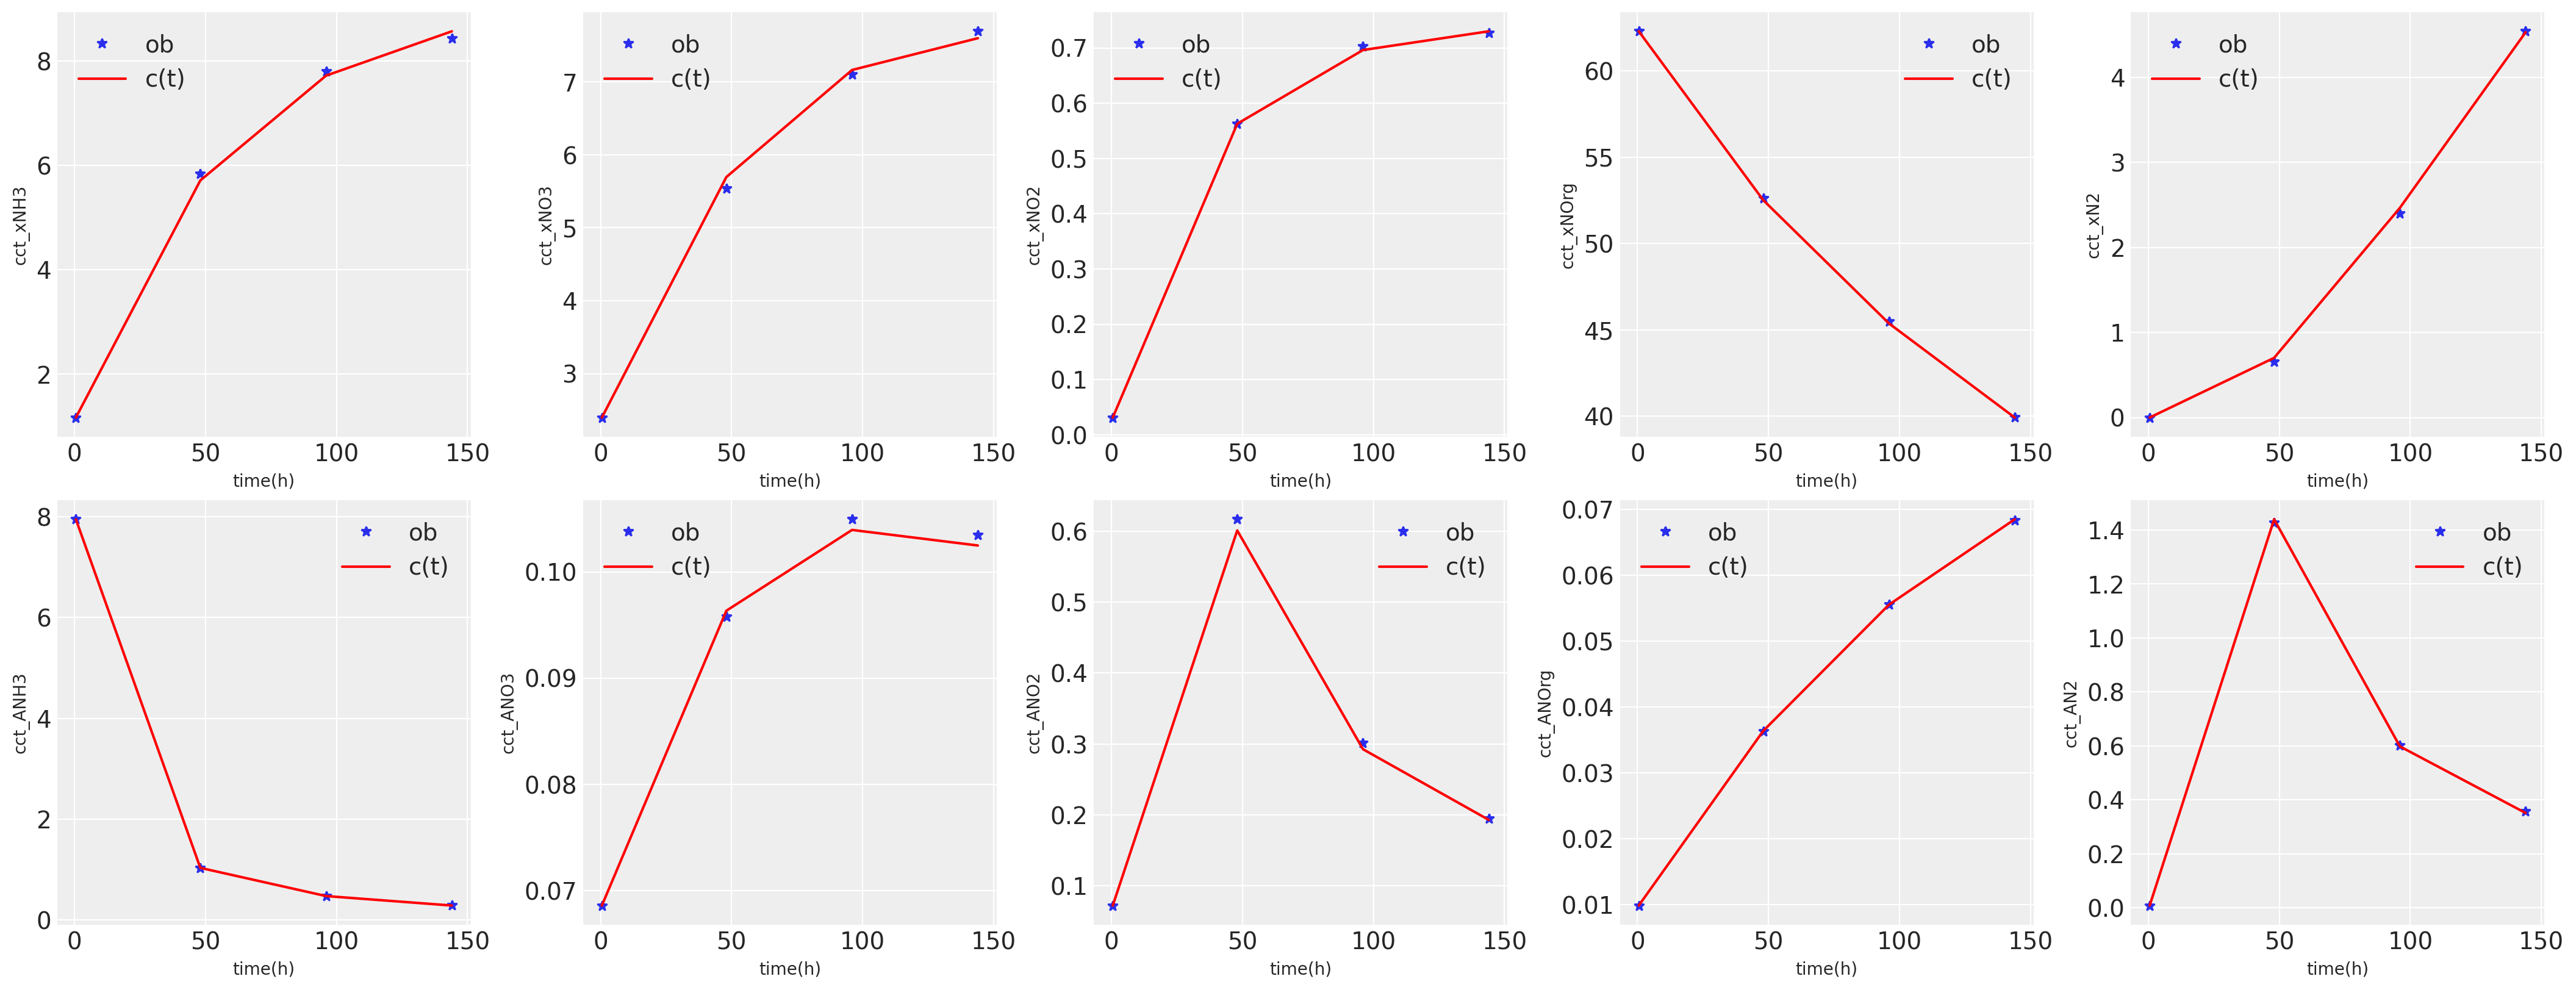

/Users/izhangxm/WorkStation/PycharmProjects/N15Tracing/core.py:314: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


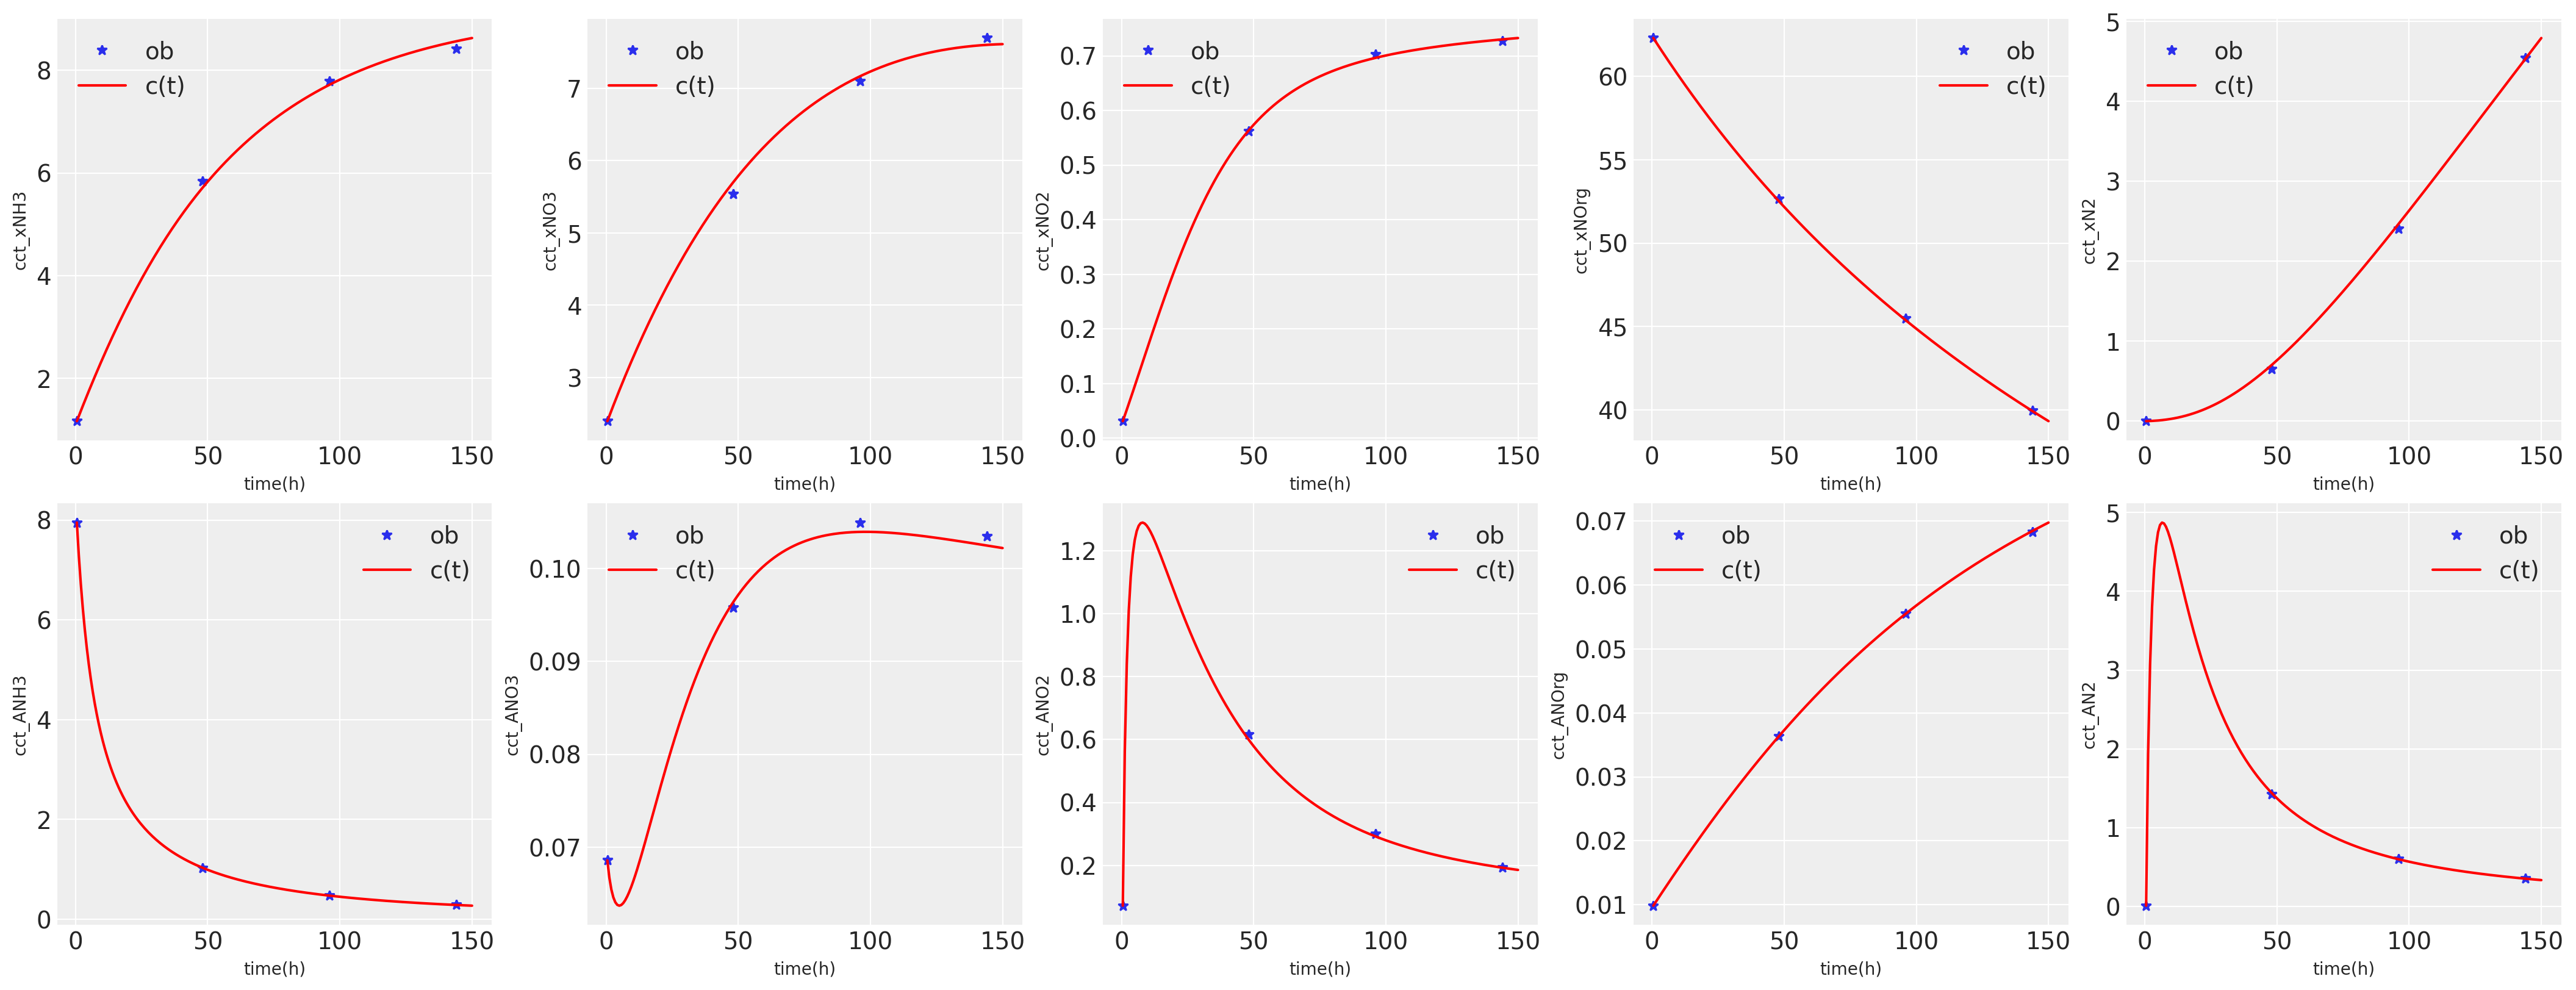

In [13]:
ks_predict = core.get_predict_ks(idata_lv)
k_kinetics = np.repeat(1, 11).astype(np.uint8)
t_eval = np.array([0.5, 48, 96, 144])

dataset_new = core.MyDataset(db_csv_path)
cct_names, rates_names, error_names = dataset_new.get_var_col_names()
gt_s = dataset_new.get_cct()[0]

dataset_new.set_as_sim_dataset(core.dcdt_func_for_odeint, t_eval, gt_s, args=(ks_predict, k_kinetics))

print("r2_loss", core.r2_loss(dataset_new.get_cct(), dataset.get_cct()))
core.plot_dataset(dataset, dataset_new)


t_eval_new = np.linspace(0.5, 150, 200)
dataset_new2 = core.MyDataset(db_csv_path)
dataset_new2.set_as_sim_dataset(core.dcdt_func_for_odeint, t_eval_new, gt_s, t0=0.5, args=(ks_predict, k_kinetics))
core.plot_dataset(dataset, dataset_new2)